## Background & Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged on every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers’ and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help bank improve their services so that customers do not renounce their credit cards

## Objective

Explore and visualize the dataset.
Build a classification model to predict if the customer is going to churn or not
Optimize the model using appropriate techniques
Generate a set of insights and recommendations that will help the bank
Data Dictionary:
* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then 1 else 0
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

In [1]:
import warnings

warnings.filterwarnings("ignore")
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries to tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline, make_pipeline

#libraries to help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier)
from xgboost import XGBClassifier

In [2]:
data = pd.read_csv('BankChurners.csv')

In [3]:
data.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   
3              34  ...                       4                      1   
4              21  ...                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  

[5 rows x 21 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

- There are 20 columns with 10127 observations in the dataset
- There doesn't look like there are any null observations

In [5]:
data.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

- Seems safe to drop CLIENTNUM col as it is unique for each customer and won't add value

In [6]:
data.drop(columns=['CLIENTNUM'], inplace=True)

#### Summary

In [7]:
data.describe().T

count         mean          std     min       25%  \
Customer_Age              10127.0    46.325960     8.016814    26.0    41.000   
Dependent_count           10127.0     2.346203     1.298908     0.0     1.000   
Months_on_book            10127.0    35.928409     7.986416    13.0    31.000   
Total_Relationship_Count  10127.0     3.812580     1.554408     1.0     3.000   
Months_Inactive_12_mon    10127.0     2.341167     1.010622     0.0     2.000   
Contacts_Count_12_mon     10127.0     2.455317     1.106225     0.0     2.000   
Credit_Limit              10127.0  8631.953698  9088.776650  1438.3  2555.000   
Total_Revolving_Bal       10127.0  1162.814061   814.987335     0.0   359.000   
Avg_Open_To_Buy           10127.0  7469.139637  9090.685324     3.0  1324.500   
Total_Amt_Chng_Q4_Q1      10127.0     0.759941     0.219207     0.0     0.631   
Total_Trans_Amt           10127.0  4404.086304  3397.129254   510.0  2155.500   
Total_Trans_Ct            10127.0    64.858695    23.472570    10.0    45.000   
Total_Ct_Chng_Q4_Q1       10127.0     0.712222     0.238086     0.0     0.582   
Avg_Utilization_Ratio     10127.0     0.274894     0.275691     0.0     0.023   

                               50%        75%        max  
Customer_Age                46.000     52.000     73.000  
Dependent_count              2.000      3.000      5.000  
Months_on_book              36.000     40.000     56.000  
Total_Relationship_Count     4.000      5.000      6.000  
Months_Inactive_12_mon       2.000      3.000      6.000  
Contacts_Count_12_mon        2.000      3.000      6.000  
Credit_Limit              4549.000  11067.500  34516.000  
Total_Revolving_Bal       1276.000   1784.000   2517.000  
Avg_Open_To_Buy           3474.000   9859.000  34516.000  
Total_Amt_Chng_Q4_Q1         0.736      0.859      3.397  
Total_Trans_Amt           3899.000   4741.000  18484.000  
Total_Trans_Ct              67.000     81.000    139.000  
Total_Ct_Chng_Q4_Q1          0.702      0.818      3.714  
Avg_Utilization_Ratio        0.176      0.503      0.999

- Columns `Avg_Open_To_Buy`, `Total_Amt_Chng_Q4_Q1`, `Total_Trans_Amt`, `Total_Ct_Chng_Q4_Q1` seem to have outliers as their third quartile and max have pretty large differences
- `Credit_Limit` and `Avg_Open_To_Buy` have the same maximum value, 34516

## Data Preprocessing

Check the count of each unique category in the dataset

In [8]:
cat_col = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 40)

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
----------------------------------------
F    5358
M    4769
Name: Gender, dtype: int64
----------------------------------------
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
----------------------------------------
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64
----------------------------------------
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64
----------------------------------------
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64
----------------------------------------


- There are unknown values in `Education_Level`, `Income_Category` and `Marital_Status`. I will try to impute them later
- `Attrition_Flag` and `Gender` can probably be converted to binary variables
- It might be useful to convert `Education_Level` and `Card_Category` to discrete variables to reflect them being hierarchical 
- I believe that 'College' and 'Graduate' are referring to the same thing in `Education_Level`, so I would combine them.

In [9]:
# Converting Gender and Attrition to binary
data['Attrition_Flag'].replace('Attrited Customer',1,inplace=True) 
data['Attrition_Flag'].replace('Existing Customer',0,inplace=True)

data['Gender'].replace('M',1,inplace=True) 
data['Gender'].replace('F',0,inplace=True)

In [10]:
# Replacing 'College' with 'Graduate'
data["Education_Level"] = data["Education_Level"].replace("College", "Graduate")

## EDA

### Univariate

In [11]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical
# variable.
# This function takes the numerical column as the input and returns the boxplots
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(
        feature, kde=F, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        np.mean(feature), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        np.median(feature), color="black", linestyle="-"
    )  # Add median to the histogram

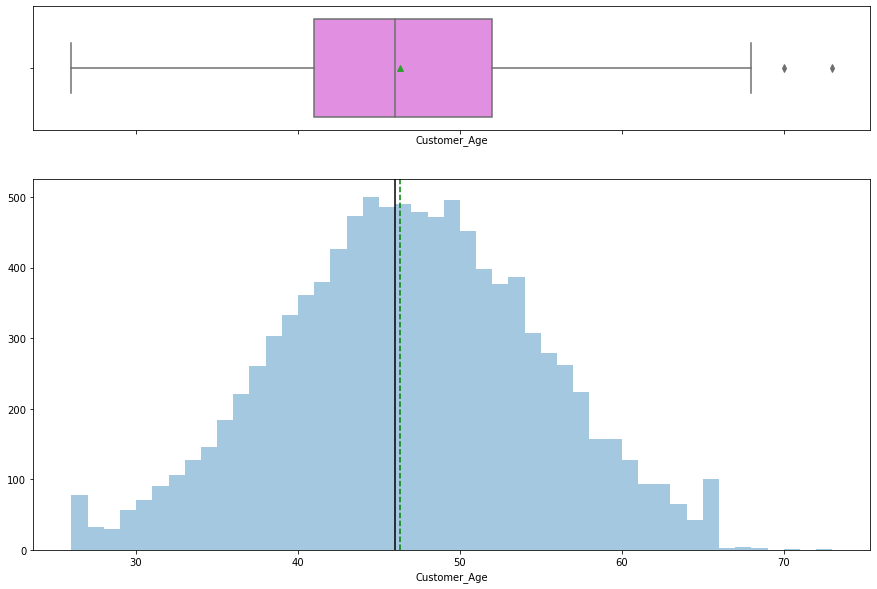

In [12]:
# Observations on Customer_age
histogram_boxplot(data["Customer_Age"])

- There are two outliers in this variable, both greater than 70
- Data is distributed normally with the mean and median being almost identical

In [13]:
# Dropping observations with ages > 70
data.drop(index=data[data.Customer_Age > 70].index, inplace=True)

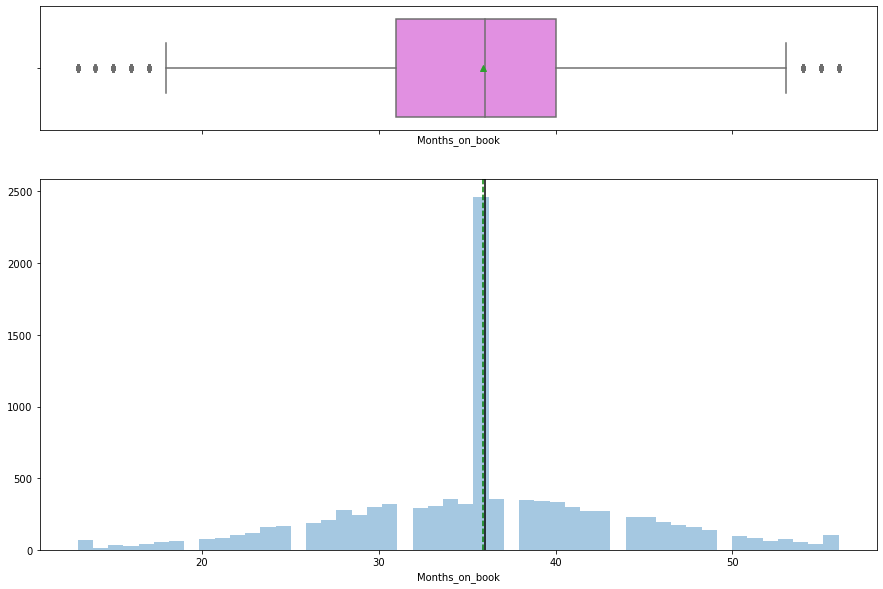

In [14]:
# Observations on Months_on_book
histogram_boxplot(data["Months_on_book"])

- There are 8 outliers in this variable
- Most of the dataset is found at the mean and median

In [15]:
#Clipping the values to be closer to the tails
data['Months_on_book'].clip(lower=18,upper=54,inplace=True)

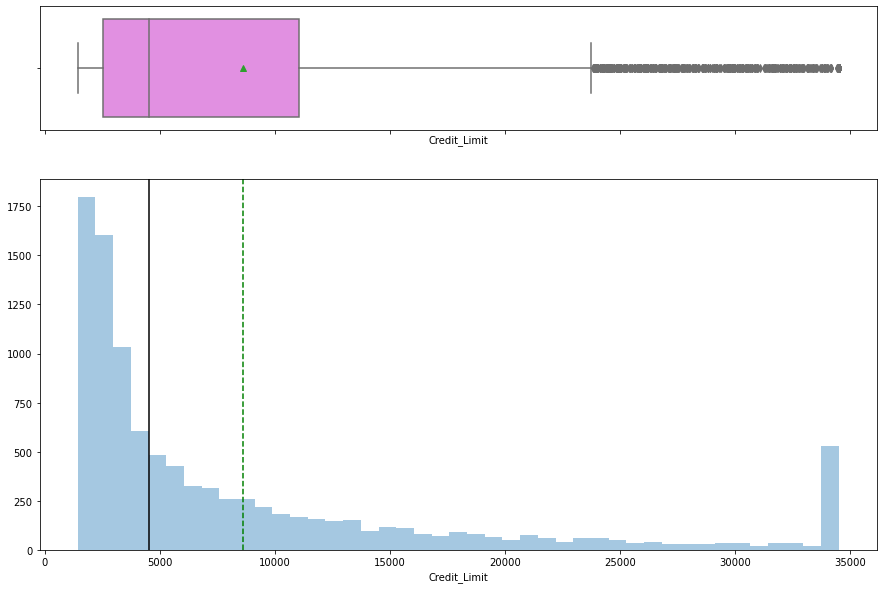

In [16]:
# Observations on Credit_Limit
histogram_boxplot(data["Credit_Limit"])

- Mean is much greater than the median, reflects the right skewness
- Credit_Limit being higher than ~23000 is an outlier
- No need to cap I think, represents how much higher some customers' limits are than others and those with extreme limits might be predisposed to closing their account
- Lots of points at the max, 34516

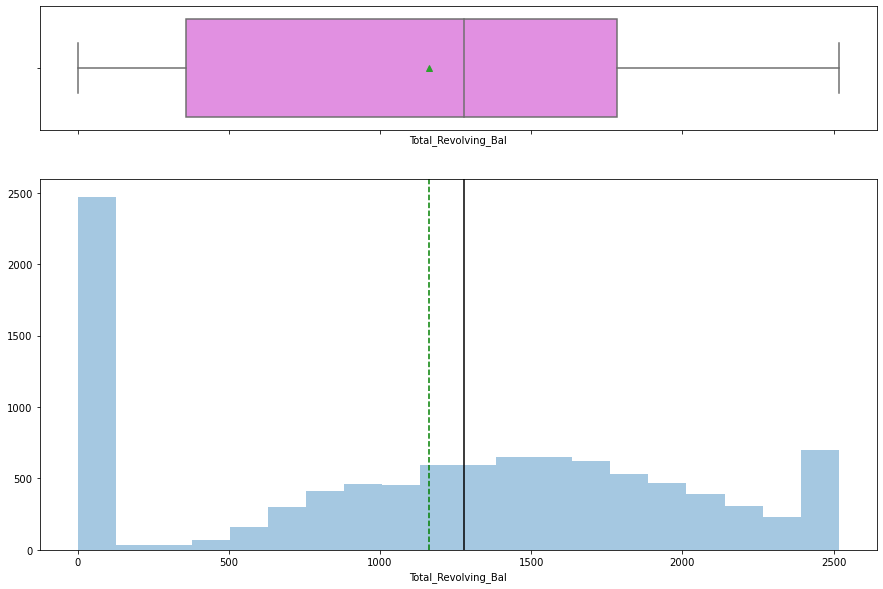

In [17]:
# Observations on Total_Revolving_Bal
histogram_boxplot(data["Total_Revolving_Bal"])

- No outliers in the dataset
- A large chunk of the people in this set have a revolving balance of 0

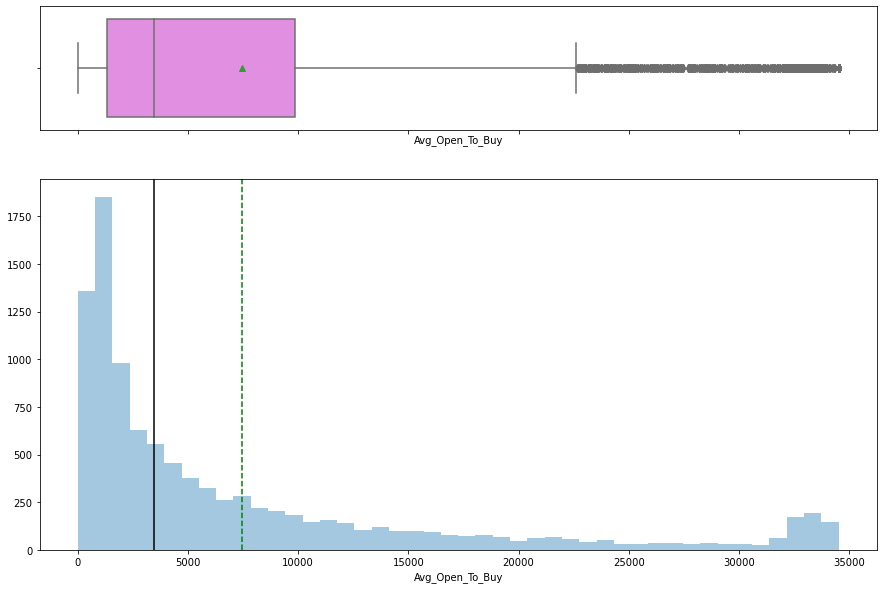

In [18]:
# Observations on Avg_Open_To_Buy
histogram_boxplot(data["Avg_Open_To_Buy"])

- The histogram and boxplot of this variable are very similar to the plots from the Credit_Limit set, which is to be expected given that people pay off their credit card debt

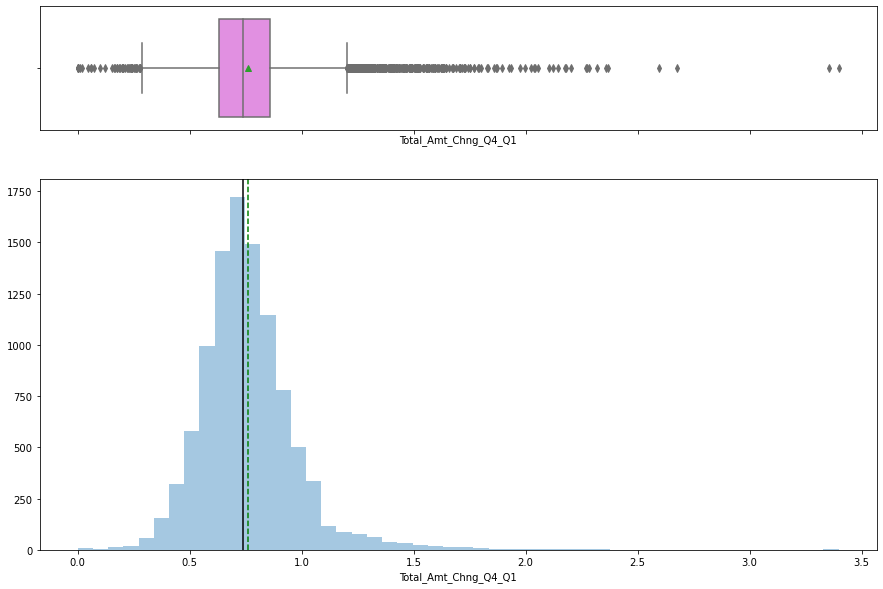

In [19]:
# Observations on Total_Amt_Chng_Q4_Q1
histogram_boxplot(data["Total_Amt_Chng_Q4_Q1"])

- Data is right skewed
- Won't remove all of the outliers but will clip some of the more extreme points

In [20]:
data['Total_Amt_Chng_Q4_Q1'].clip(upper=2.5,inplace=True)

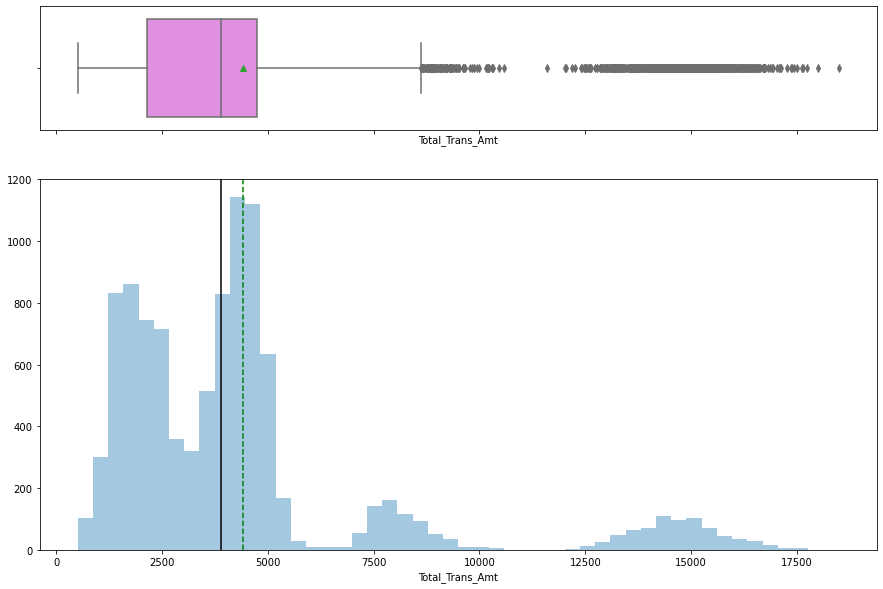

In [21]:
# Observations on Total_Trans_Amt
histogram_boxplot(data["Total_Trans_Amt"])

- Right skewed
- There seems to be enough representation amongst the outliers that they probably still provide some value. I believe that the behavior of big spenders might be valuable to the model

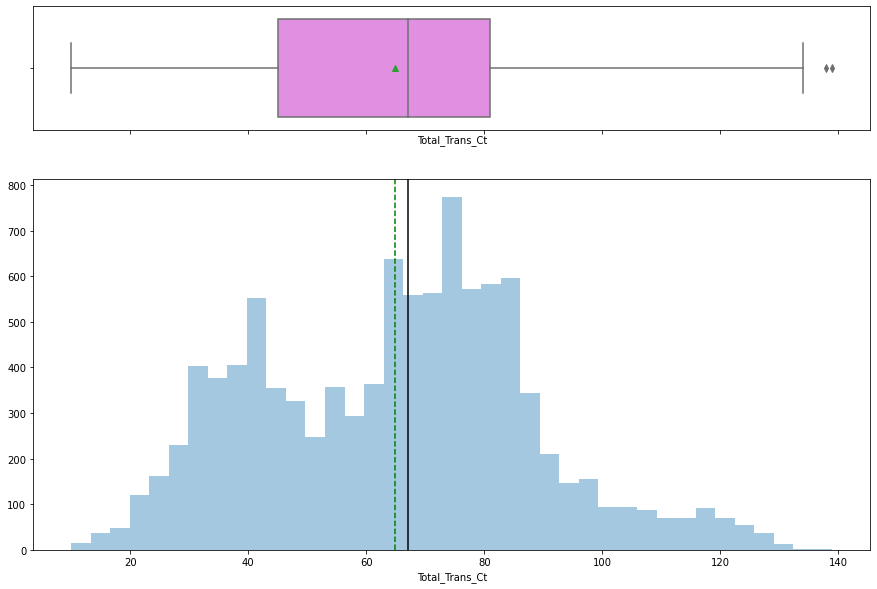

In [22]:
# Observations on Total_Trans_Ct
histogram_boxplot(data["Total_Trans_Ct"])

- This model is slightly skewed right, but it does represent that those people who are spending large amounts of money seem to be making only a slightly larger amount of transactions to those whose spending habits are closer to the average

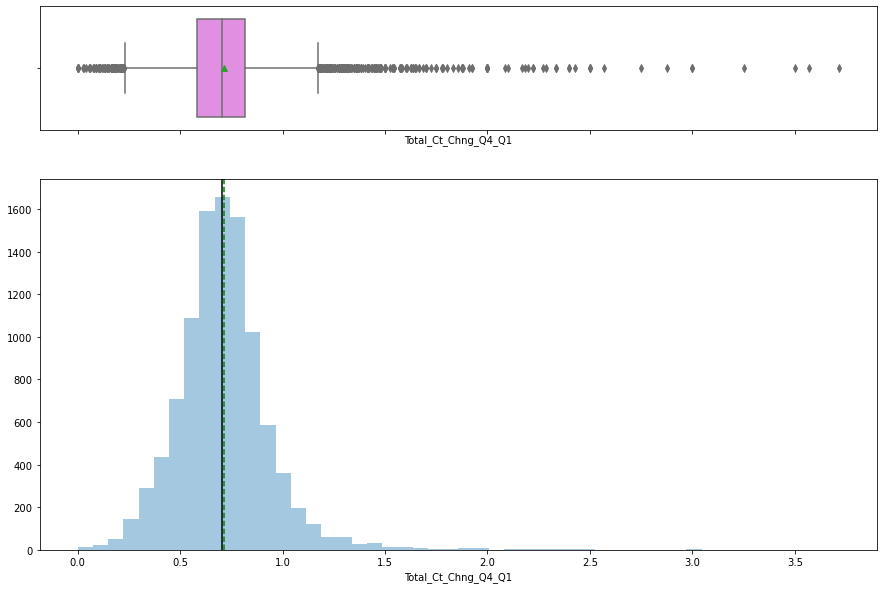

In [23]:
# Observations on Total_Ct_Chng_Q4_Q1
histogram_boxplot(data["Total_Ct_Chng_Q4_Q1"])

- Pretty similar distribution to the Total_Amt_Chng_Q4_Q1 plots, but with more extreme outliers.

In [24]:
data['Total_Ct_Chng_Q4_Q1'].clip(upper=2.5,inplace=True)

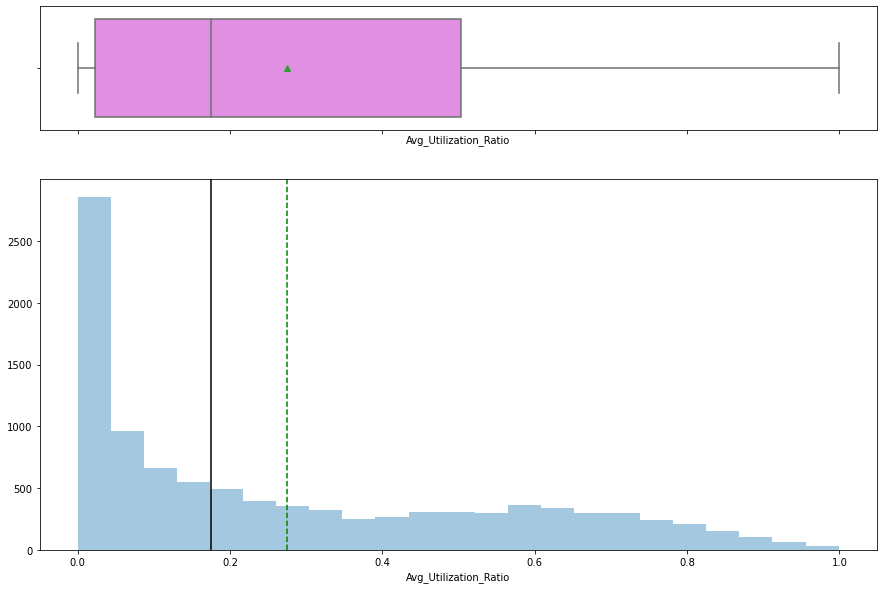

In [25]:
# Observations on Avg_Utilization_Ratio
histogram_boxplot(data["Avg_Utilization_Ratio"])

- Right skewed, seems that there are a lot of people not using their credit cards

In [26]:
def perc_on_bar(feature):
    """
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    """
    # Creating a countplot for the feature
    sns.set(rc={"figure.figsize": (10, 5)})
    ax = sns.countplot(x=feature, data=data)

    total = len(feature)  # length of the column
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.1  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot
        ax.annotate(percentage, (x, y), size=14)  # annotate the percantage

    plt.show()  # show the plot

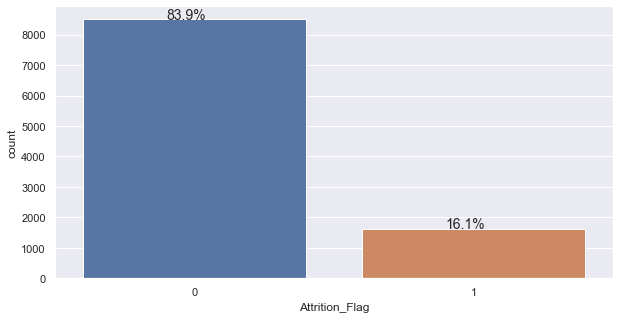

In [27]:
# observations on Attrition_Flag
perc_on_bar(data["Attrition_Flag"])

- Majority of customers have not closed their accounts

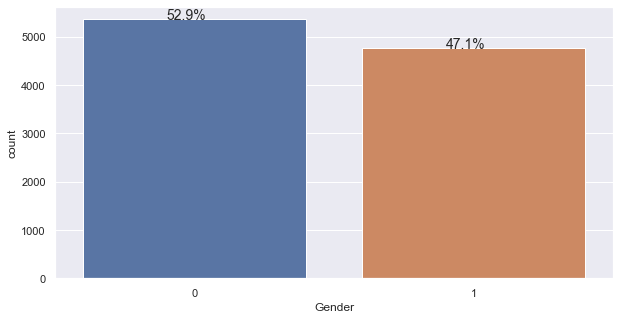

In [28]:
# observations on Gender
perc_on_bar(data["Gender"])

- Majority of cardholders are female

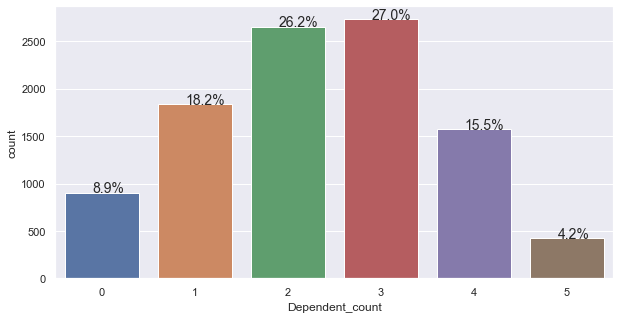

In [29]:
# observations on Dependent_count
perc_on_bar(data["Dependent_count"])

- Only ~9% of customers have 0 dependents
- Most have 2 or 3

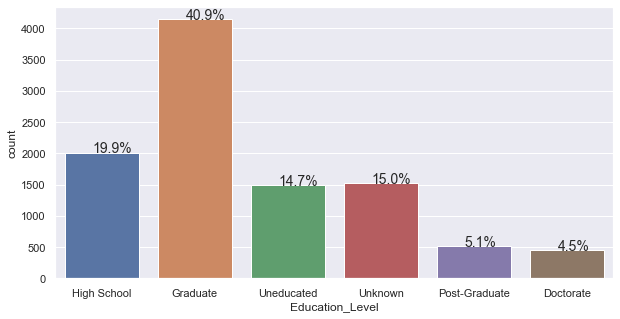

In [30]:
# observations on Education_Level
perc_on_bar(data["Education_Level"])

- Graduates make up most of the carholders in this set

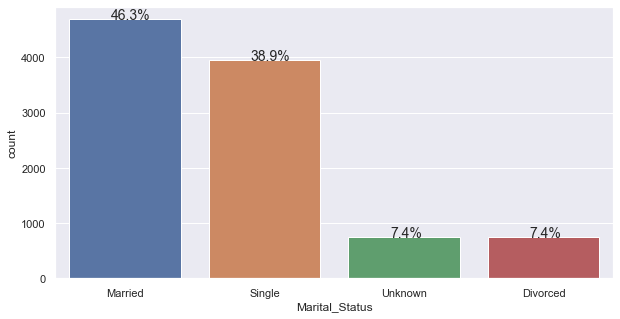

In [31]:
# observations on Marital_Status
perc_on_bar(data["Marital_Status"])

- Most of the customers are married or single

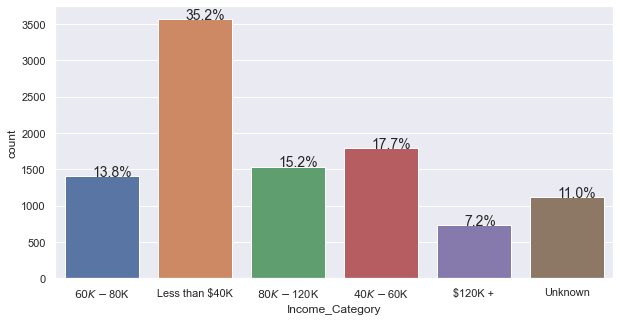

In [32]:
# observations on Income_Category
perc_on_bar(data["Income_Category"])

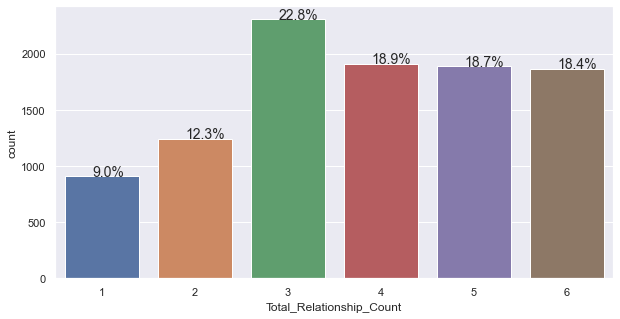

In [33]:
# observations on Total_Relationship_Count
perc_on_bar(data["Total_Relationship_Count"])

- Most customers have at least 3 of our products

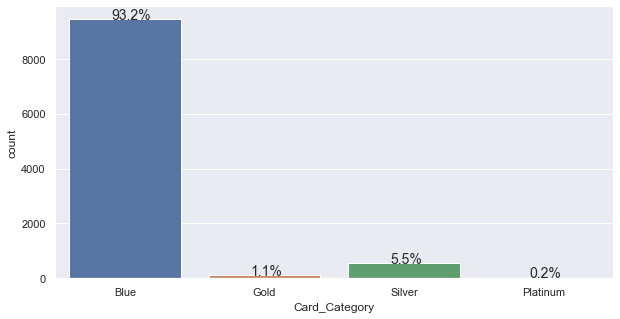

In [34]:
# observations on Card_Category
perc_on_bar(data["Card_Category"])

- Almost all cardholders have a blue card
- ~1.3% have a Gold or Platinum card

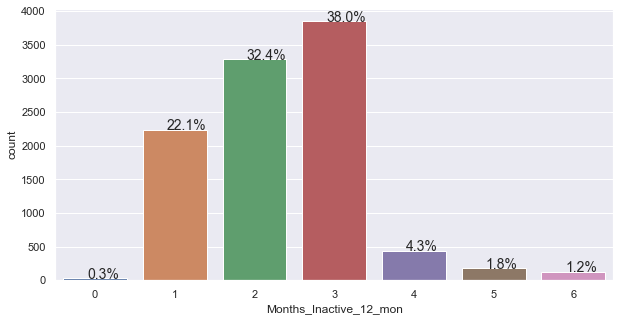

In [35]:
# observations on Months_Inactive_12_mon
perc_on_bar(data["Months_Inactive_12_mon"])

- Very few are active for all 12 months
- Almost everyone is inactive for 1, 2, or 3 months

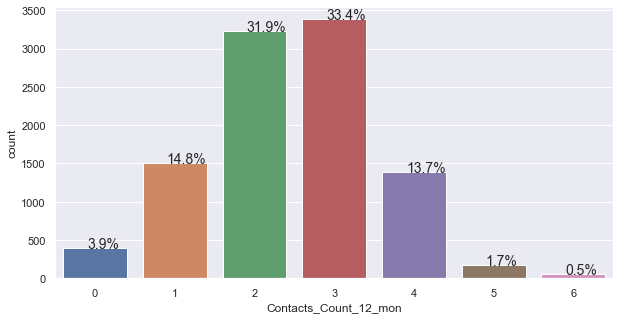

In [36]:
# observations on Contacts_Count_12_mon
perc_on_bar(data["Contacts_Count_12_mon"])

- 96.1% of customers contacted us at least once over a 12 month period, and almost half did so at least 3 times

### Bivariate 

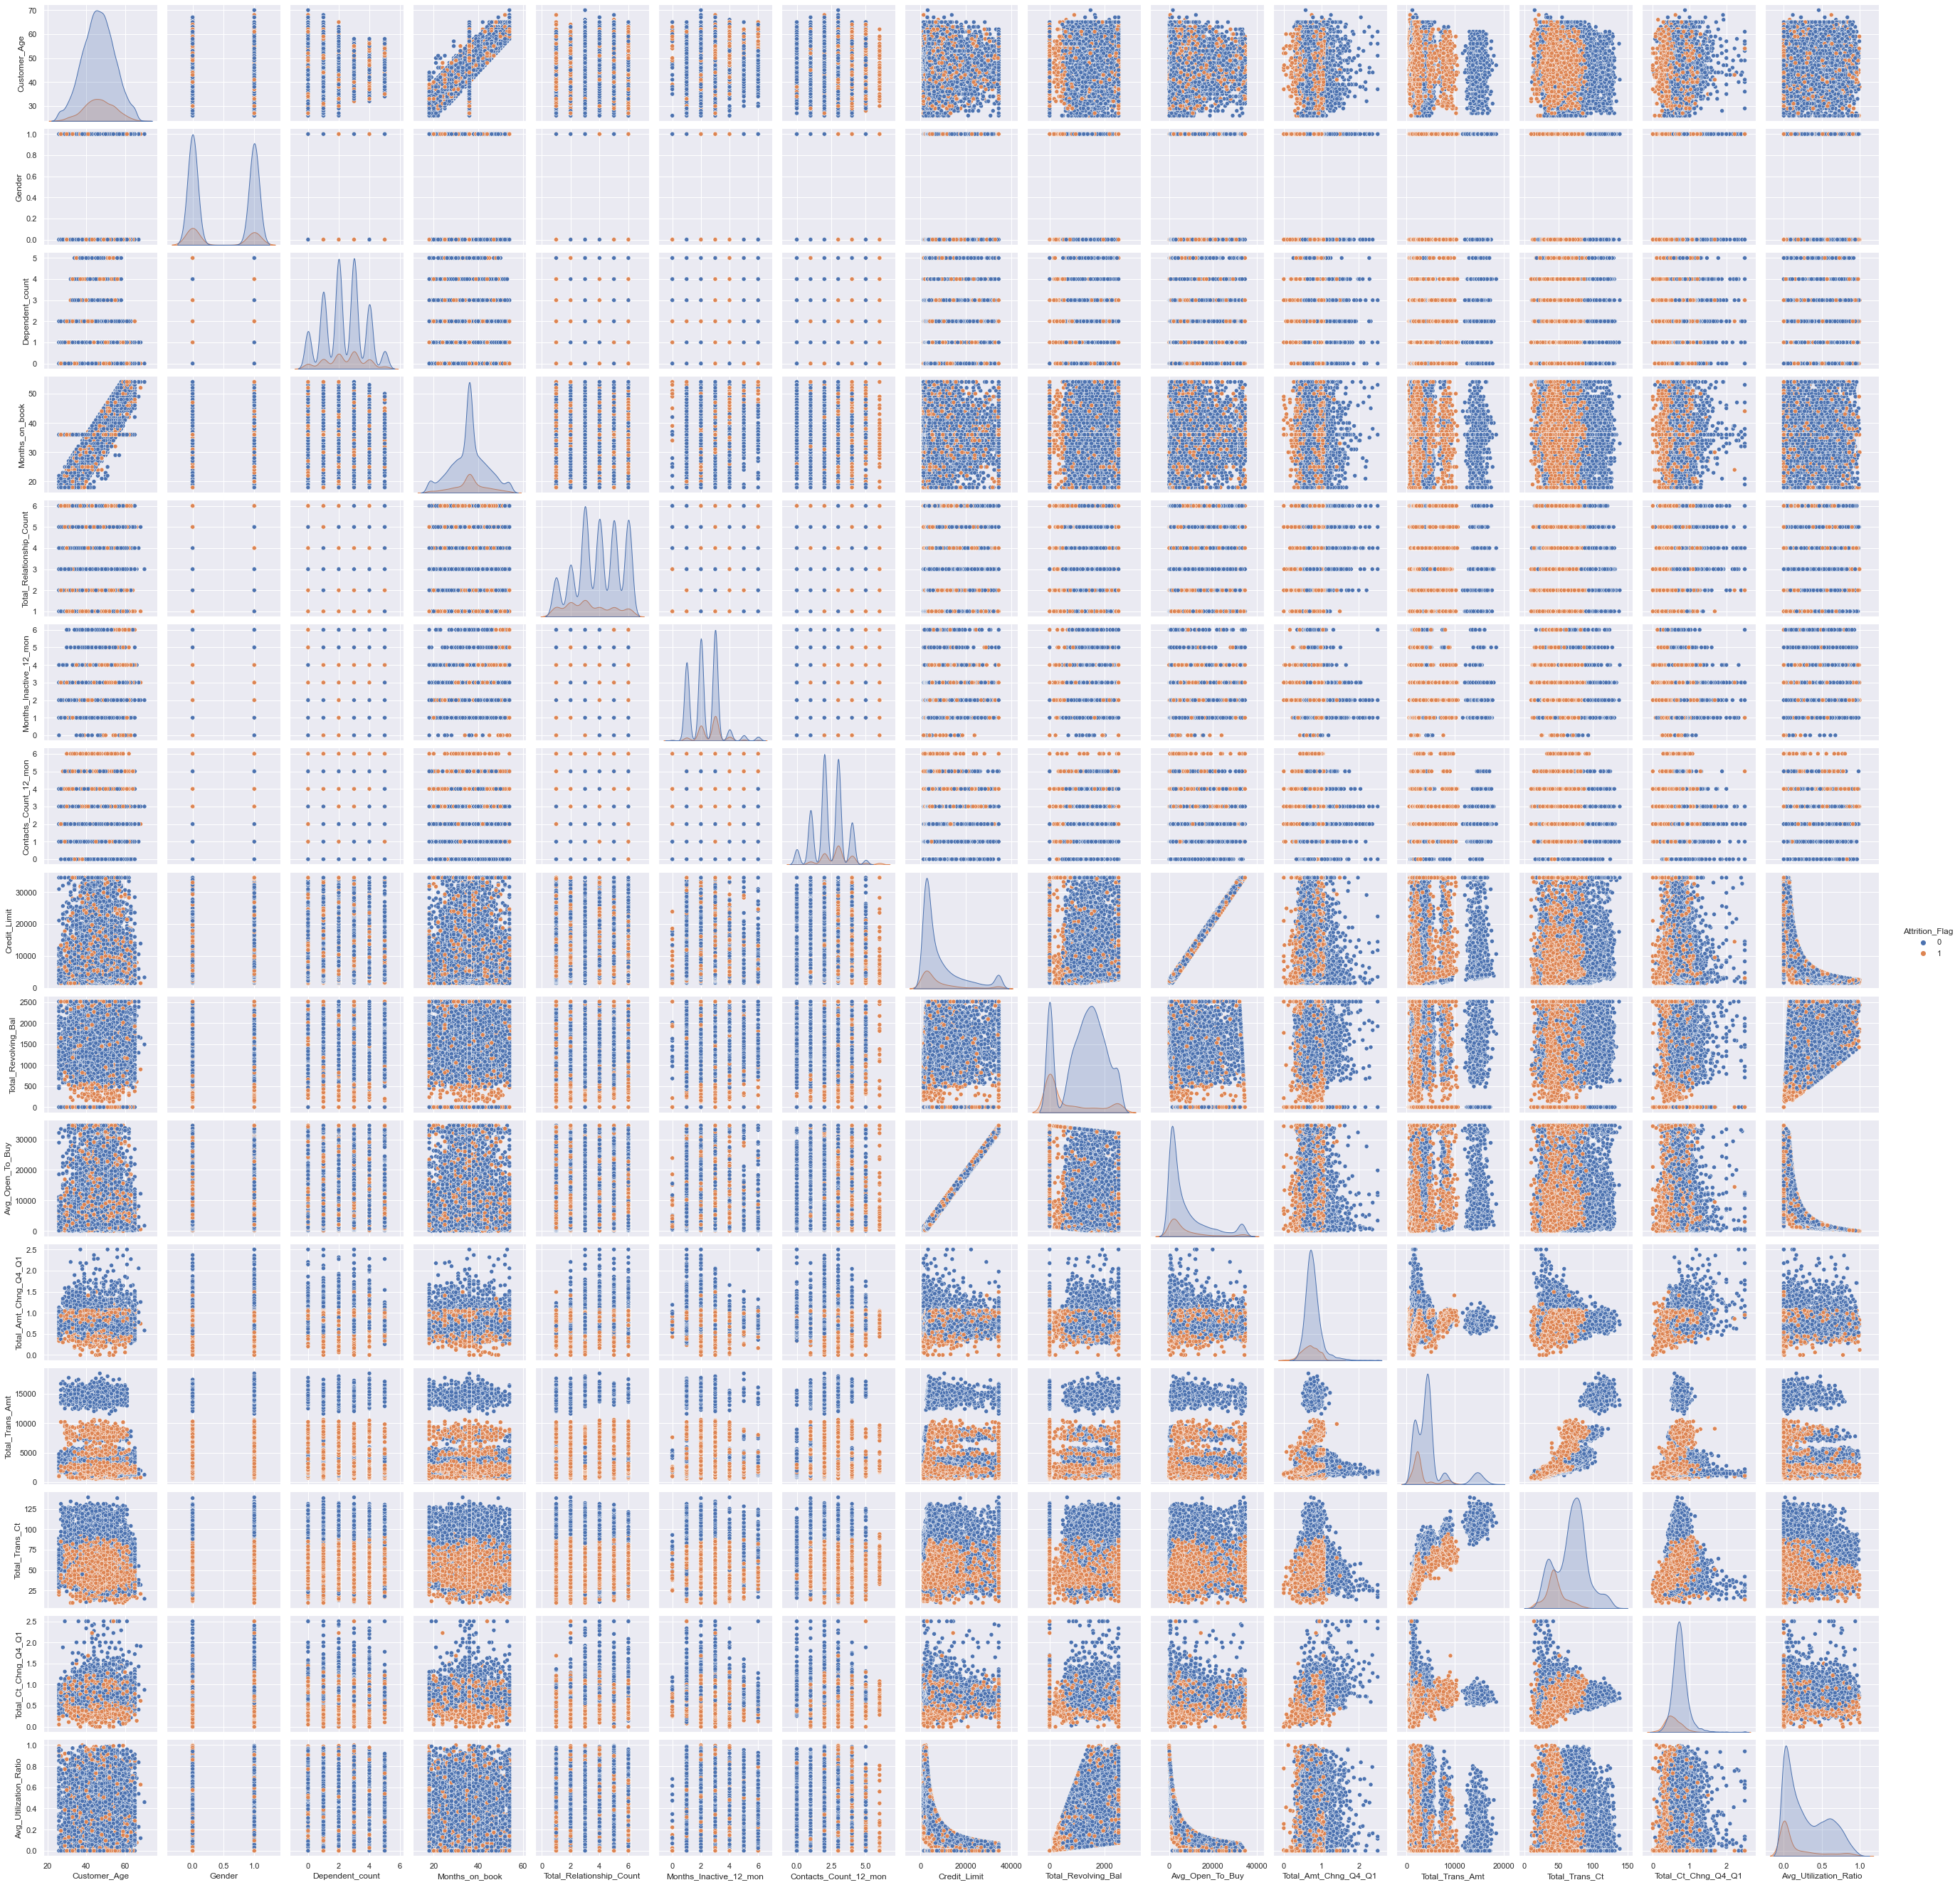

In [37]:
sns.pairplot(data, hue="Attrition_Flag")

- There don't seem to be any obvious trends wrt people dropping their cards and relationships between other variables

<AxesSubplot:xlabel='Card_Category', ylabel='Total_Trans_Amt'>

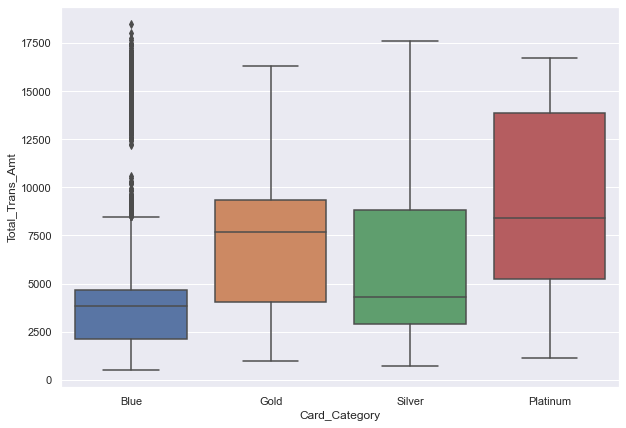

In [38]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(y="Total_Trans_Amt", x="Card_Category", data=data, orient="vertical")

- As to be expected, big spending is the norm among those with higher tier cards, although there are those with blue cards that spend as much as those with other cards

<AxesSubplot:xlabel='Education_Level', ylabel='Total_Trans_Amt'>

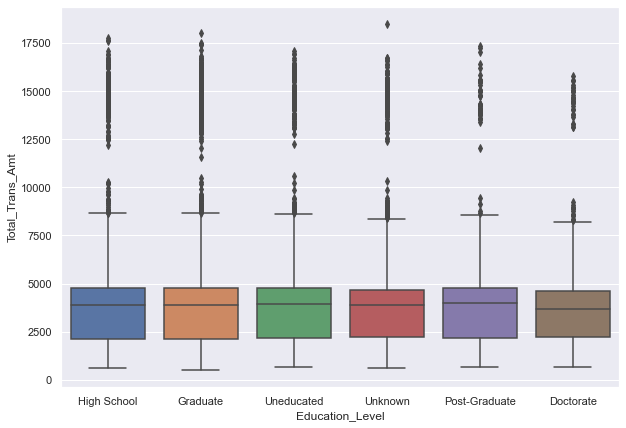

In [39]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(y="Total_Trans_Amt", x="Education_Level", data=data, orient="vertical")

- Education level doesn't seem to be a great predictor of spending

<AxesSubplot:xlabel='Total_Trans_Amt', ylabel='Total_Revolving_Bal'>

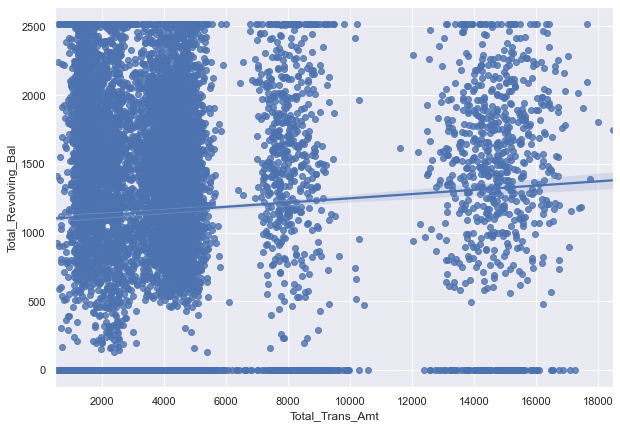

In [40]:
sns.regplot(y=data.Total_Revolving_Bal, x=data.Total_Trans_Amt)

- No relationship seen between revolving balance and transaction totals

In [41]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set(palette="nipy_spectral")
    tab1 = pd.crosstab(x, data["Attrition_Flag"], margins=True)
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(x, data["Attrition_Flag"], normalize="index")
    tab.plot(kind="bar", stacked=True, figsize=(10, 5))
    plt.legend(loc="lower left", frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Attrition_Flag      0     1    All
Education_Level                   
Doctorate         356    95    451
Graduate         3500   641   4141
High School      1706   306   2012
Post-Graduate     424    92    516
Uneducated       1250   237   1487
Unknown          1263   256   1519
All              8499  1627  10126
------------------------------------------------------------------------------------------------------------------------


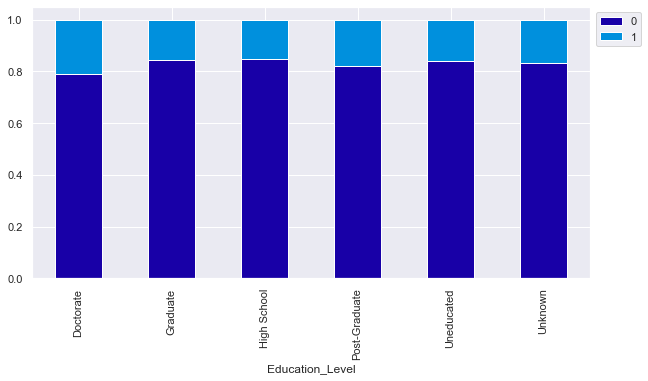

In [42]:
stacked_plot(data["Education_Level"])

- Those with doctorates seems the most likely to close their account

Attrition_Flag     0     1    All
Marital_Status                   
Divorced         627   121    748
Married         3977   709   4686
Single          3275   668   3943
Unknown          620   129    749
All             8499  1627  10126
------------------------------------------------------------------------------------------------------------------------


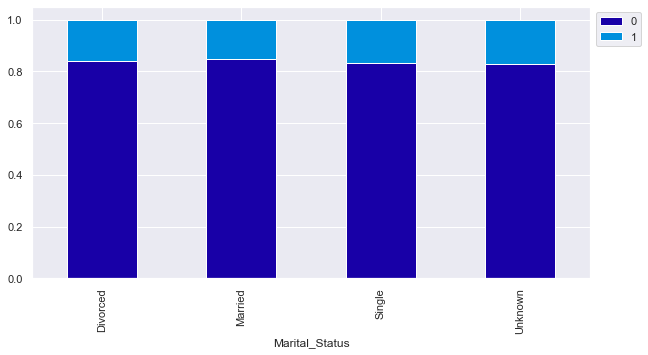

In [43]:
stacked_plot(data["Marital_Status"])

- Marital Status does not seem correlated to attrition

Attrition_Flag      0     1    All
Income_Category                   
$120K +           601   126    727
$40K - $60K      1518   271   1789
$60K - $80K      1213   189   1402
$80K - $120K     1293   242   1535
Less than $40K   2949   612   3561
Unknown           925   187   1112
All              8499  1627  10126
------------------------------------------------------------------------------------------------------------------------


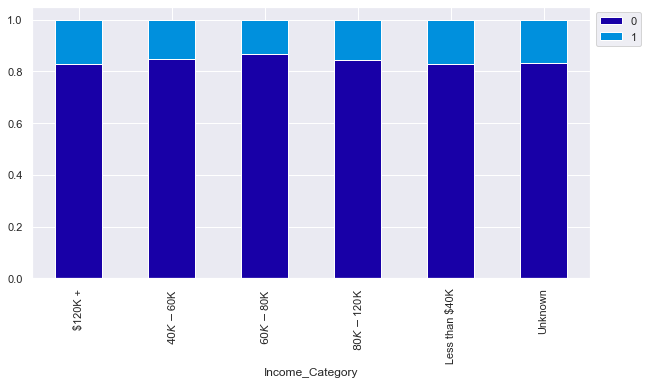

In [44]:
stacked_plot(data["Income_Category"])

- Those who make 60k-80k are the least likely to close their accounts

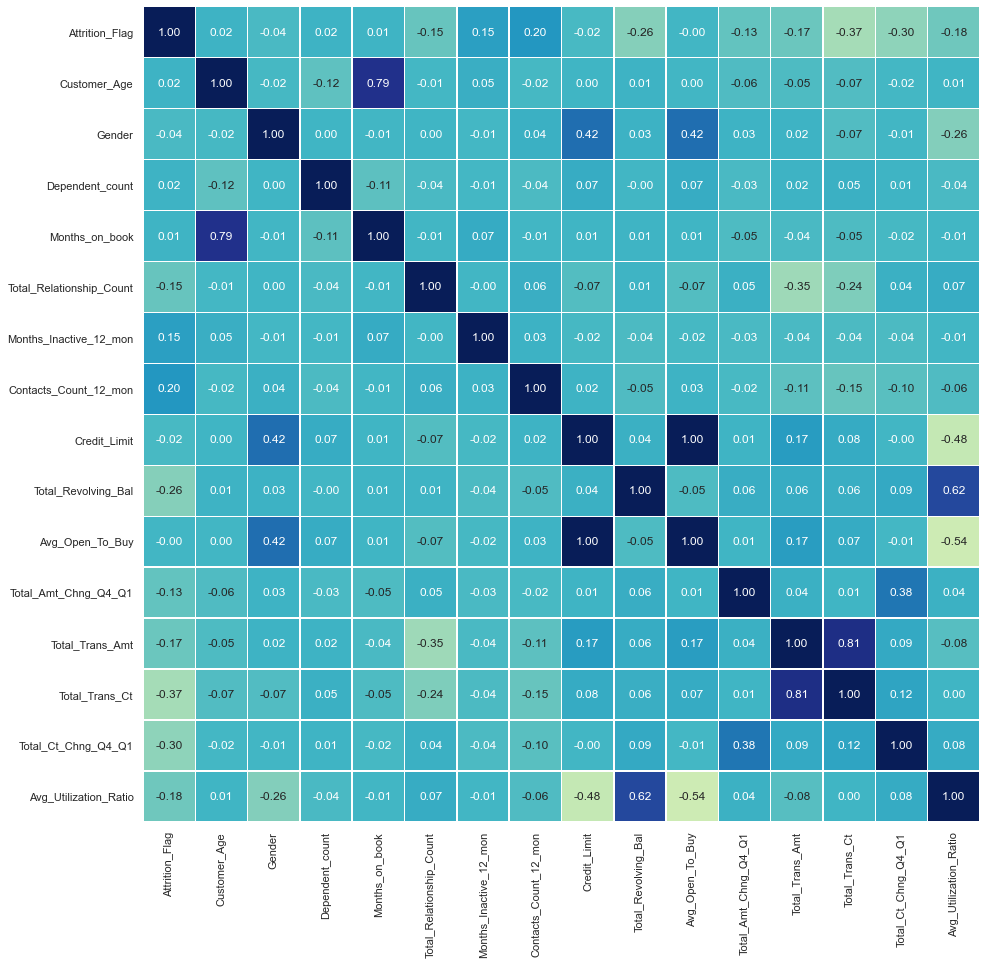

In [45]:
sns.set(rc={"figure.figsize": (15, 15)})
sns.heatmap(
    data.corr(),
    annot=True,
    linewidths=0.5,
    center=0,
    cbar=False,
    cmap="YlGnBu",
    fmt="0.2f",
)
plt.show()

- Many correlations are predictable, such as those with more months on the books being older and people with more transactions spend more money
- People who use their cards more have a higher have a higher revolving balance, as expected
- Avg_Open_To_Buy and Credit_Limit are perfectly correlated, so we can drop one

## Data Preparation

In [46]:
# Dropping Avg_Open_To_Buy as it is perfectly correlated with credit limit
data.drop(columns=['Avg_Open_To_Buy'],inplace=True)

### Missing value treatment

In [47]:
cols_for_impute=['Education_Level', 'Marital_Status', 'Income_Category']
#Replace 'Unknown' values with NaN
for i in cols_for_impute:
    data[i].replace('Unknown', np.NaN, inplace=True)

In [48]:
imputer = KNNImputer(n_neighbors=5)

In [49]:
data1=data.copy()

In [50]:
data['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1789
$80K - $120K      1535
$60K - $80K       1402
$120K +            727
Name: Income_Category, dtype: int64

In [51]:
#Mapping cols
education= {'Uneducated':1, 'High School':2, 'Graduate':3, 'Post-Graduate':4 ,'Doctorate':5}
marital={'Single':1,'Married':2,'Divorced':3}
income={'Less than $40K':1,'$40K - $60K':2,'$60K - $80K':3,'$80K - $120K':4,'$120K +':5}

data1['Education_Level'] = data1['Education_Level'].map(education)
data1['Marital_Status'] = data1['Marital_Status'].map(marital)
data1['Income_Category'] = data1['Income_Category'].map(income)

In [52]:
X = data1.drop(['Attrition_Flag'],axis=1)
y = data1['Attrition_Flag']

In [53]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7,stratify=y)
print(X_train.shape, X_test.shape)

(7088, 18) (3038, 18)


In [54]:
#Fit and transform the train data
X_train[cols_for_impute]=imputer.fit_transform(X_train[cols_for_impute])

#Transform the test data 
X_test[cols_for_impute]=imputer.transform(X_test[cols_for_impute])

In [55]:
#Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print('-'*30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Total_Amt_Chng_Q4_Q1      

In [56]:
## Function to inverse the encoding
def inverse_mapping(x,y):
    inv_dict = {v: k for k, v in x.items()}
    X_train[y] = np.round(X_train[y]).map(inv_dict).astype('category')
    X_test[y] = np.round(X_test[y]).map(inv_dict).astype('category')

In [57]:
inverse_mapping(education,'Education_Level')
inverse_mapping(marital,'Marital_Status')
inverse_mapping(income,'Income_Category')

In [58]:
cols = X_train.select_dtypes(include=['object','category'])
for i in cols.columns:
    print(X_train[i].value_counts())
    print('*'*30)

Graduate         3712
High School      1652
Uneducated       1040
Post-Graduate     383
Doctorate         301
Name: Education_Level, dtype: int64
******************************
Married     3529
Single      3015
Divorced     544
Name: Marital_Status, dtype: int64
******************************
Less than $40K    2495
$40K - $60K       1722
$60K - $80K       1299
$80K - $120K      1060
$120K +            512
Name: Income_Category, dtype: int64
******************************
Blue        6601
Silver       386
Gold          85
Platinum      16
Name: Card_Category, dtype: int64
******************************


- Missing values have been imputed and inverse-mapped successfully

### Encoding categorical variables

In [59]:
X_train=pd.get_dummies(X_train,drop_first=True)
X_test=pd.get_dummies(X_test,drop_first=True)
print(X_train.shape, X_test.shape)

(7088, 27) (3038, 27)


There are now 27 columns

## Building the model

### Model evaluation criterion:

#### Model can make wrong predictions as:
1. Predicting a customer is going to close their account but in reality, the customer is not going to close their account - Loss of resources
2. Predicting a customer is not going to close their account but in reality, the customer is going to close their account   - Loss of opportunity

#### Which case is more important? 
* Predicting a customer is not going to close their account but will close their account i.e. losing a customer's credit card account

#### How to reduce this loss i.e need to reduce False Negatives?
* Company would want Recall to be maximized, greater the Recall lesser the chances of false negatives.

## Logistic Regression

In [60]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,train,test,train_y,test_y,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(train)
    pred_test = model.predict(test)
    
    train_acc = model.score(train,train_y)
    test_acc = model.score(test,test_y)
    
    train_recall = metrics.recall_score(train_y,pred_train)
    test_recall = metrics.recall_score(test_y,pred_test)
    
    train_precision = metrics.precision_score(train_y,pred_train)
    test_precision = metrics.precision_score(test_y,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(train,train_y))
        print("Accuracy on test set : ",model.score(test,test_y))
        print("Recall on training set : ",metrics.recall_score(train_y,pred_train))
        print("Recall on test set : ",metrics.recall_score(test_y,pred_test))
        print("Precision on training set : ",metrics.precision_score(train_y,pred_train))
        print("Precision on test set : ",metrics.precision_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

In [61]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [62]:
lr = LogisticRegression(random_state=1)
lr.fit(X_train,y_train)

LogisticRegression(random_state=1)

**Let's evaluate the model performance by using KFold and cross_val_score**

- `K-Folds cross-validator` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

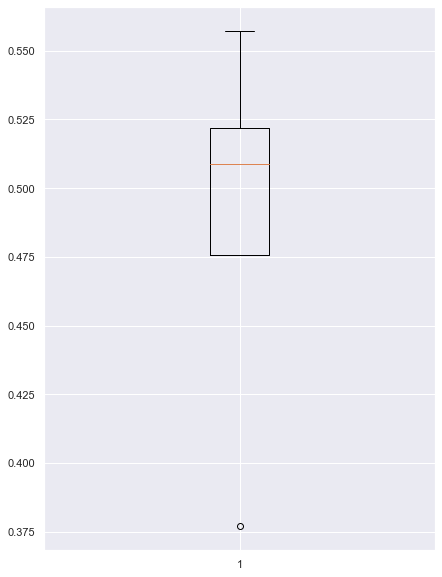

In [71]:
sns.set(rc={"figure.figsize": (7, 10)})
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_bfr=cross_val_score(estimator=lr, X=X_train, y=y_train, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

- Recall score varies between 0.56 and 0.375

Accuracy on training set :  0.8905191873589164
Accuracy on test set :  0.8857801184990125
Recall on training set :  0.4978050921861282
Recall on test set :  0.4610655737704918
Precision on training set :  0.7354085603112841
Precision on test set :  0.7281553398058253


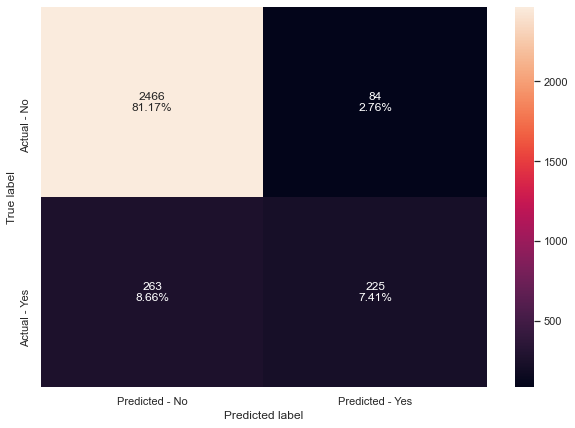

In [64]:
#Calculating different metrics
scores_LR = get_metrics_score(lr,X_train,X_test,y_train,y_test)

# creating confusion matrix
make_confusion_matrix(lr,y_test)

- Logistic regression provided a gerneralized performance on training and test set
- Recall is much too low, try oversampling to see if this model can be improved

#### Oversampling using SMOTE

In [66]:
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE

In [67]:
print("Before UpSampling, counts of label 'Yes': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label 'No': {} \n".format(sum(y_train==0)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over==1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over==0)))


print('After UpSampling, the shape of train_X: {}'.format(X_train_over.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_over.shape))

Before UpSampling, counts of label 'Yes': 1139
Before UpSampling, counts of label 'No': 5949 

After UpSampling, counts of label 'Yes': 5949
After UpSampling, counts of label 'No': 5949 

After UpSampling, the shape of train_X: (11898, 27)
After UpSampling, the shape of train_y: (11898,) 



- Before, attrition was very under-represented in the data. Now it is equally represented with non-attrition

#### Logistic Regression using oversampled data

In [68]:
log_reg_over = LogisticRegression(random_state = 1)

# Training the basic logistic regression model with training set 
log_reg_over.fit(X_train_over,y_train_over)

LogisticRegression(random_state=1)

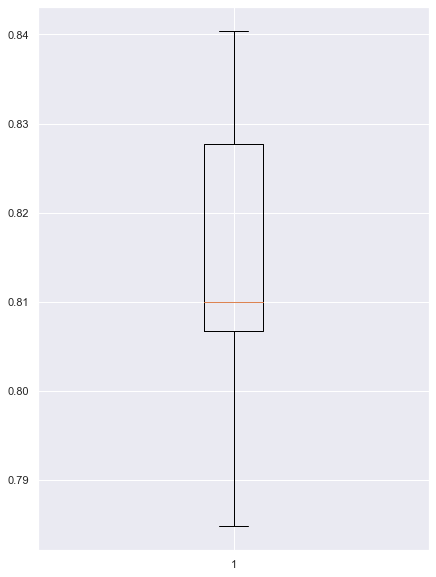

In [72]:
sns.set(rc={"figure.figsize": (7, 10)})
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_over=cross_val_score(estimator=log_reg_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over)
plt.show()

- Performance on training set varies between 0.78 and 0.84, which is a massive improvement

Accuracy on training set :  0.8027399562951757
Accuracy on test set :  0.8077682685977617
Recall on training set :  0.7964363758614893
Recall on test set :  0.7745901639344263
Precision on training set :  0.8066053796390875
Precision on test set :  0.44366197183098594


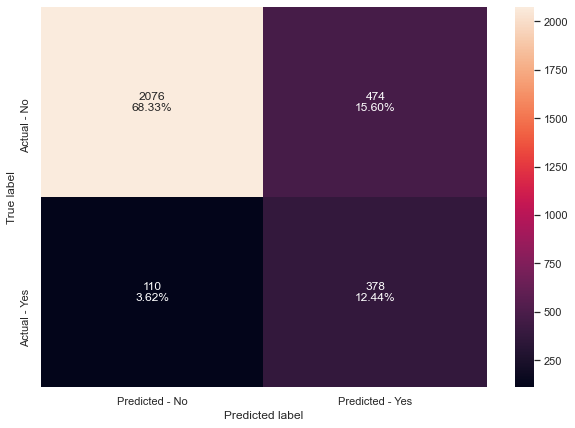

In [70]:
#Calculating different metrics
get_metrics_score(log_reg_over,X_train_over,X_test,y_train_over,y_test)

# creating confusion matrix
make_confusion_matrix(log_reg_over,y_test)

- Accuracy and Precision are worse but Recall is much better, and generalized
- No need to regularize this model, but will try undersampling

#### Logistic regression using undersampled data

In [73]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state = 1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [74]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train==1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train==0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un==1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un==0)))

print('After Under Sampling, the shape of train_X: {}'.format(X_train_un.shape))
print('After Under Sampling, the shape of train_y: {} \n'.format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 1139
Before Under Sampling, counts of label 'No': 5949 

After Under Sampling, counts of label 'Yes': 1139
After Under Sampling, counts of label 'No': 1139 

After Under Sampling, the shape of train_X: (2278, 27)
After Under Sampling, the shape of train_y: (2278,) 



In [76]:
log_reg_under = LogisticRegression(random_state = 1)
log_reg_under.fit(X_train_un,y_train_un )

LogisticRegression(random_state=1)

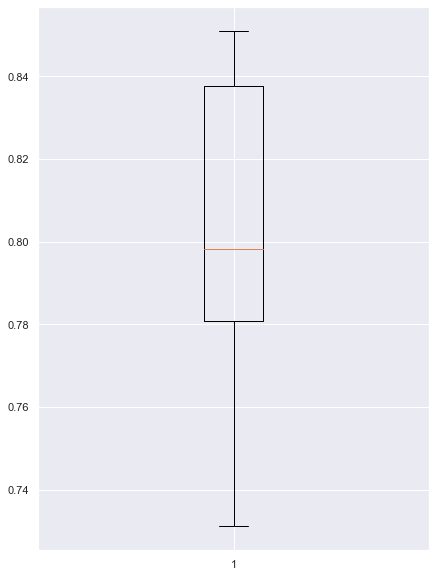

In [77]:
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_under=cross_val_score(estimator=log_reg_under, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_under)
plt.show()

- Performance on training set is almost as good as oversampled model

Accuracy on training set :  0.8068481123792801
Accuracy on test set :  0.8067807768268598
Recall on training set :  0.7963125548726954
Recall on test set :  0.7889344262295082
Precision on training set :  0.8134529147982063
Precision on test set :  0.4430379746835443


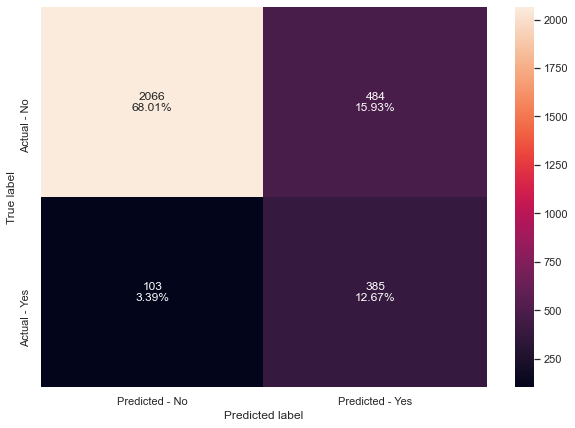

In [78]:
#Calculating different metrics
get_metrics_score(log_reg_under,X_train_un,X_test,y_train_un,y_test)


# creating confusion matrix
make_confusion_matrix(log_reg_under,y_test)

- The scores on this model are slightly better than the oversampled data, with the exception of Acc
- Model is generalized
- Best LR model so far

## Bagging & Boosting

In [79]:
models = []  # Empty list to store all the models

# Appending pipelines for each model into the list
models.append(
    (
        "RF",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("random_forest", RandomForestClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "GBM",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("gradient_boosting", GradientBoostingClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "ADB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("adaboost", AdaBoostClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "XGB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("xgboost", XGBClassifier(random_state=1,eval_metric='logloss')),
            ]
        ),
    )
)
models.append(
    (
        "DTREE",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("decision_tree", DecisionTreeClassifier(random_state=1)),
            ]
        ),
    )
)
results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

RF: 79.27737846819693
GBM: 84.81142283020326
ADB: 83.66913980987711
XGB: 89.28974418424916
DTREE: 79.19043202720457


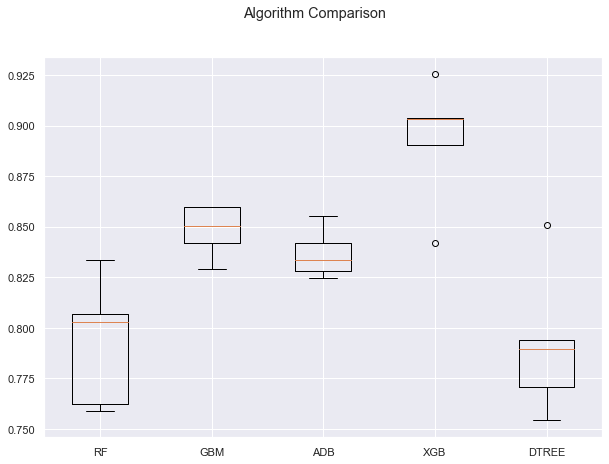

In [80]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

- XGBoost is the model with the best performance but is unpredictable. 
- Gradient boosting and Adaboost are also performing pretty well
- Including logistic regression with undersampling, XGB, GBM, and ADB are the models with the best cross-validated Recall score, so those will be the models used in Hyperparameter tuning

## Hyperparameter Tuning

**We will use pipelines with StandardScaler and  AdaBoost, XGBoost, and Gradient boost models and tune the models using GridSearchCV and RandomizedSearchCV. We will also compare the performance and time taken by these two methods - grid search and randomized search.**

In [89]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model, flag=True):
    """
    model : classifier to predict values of X

    """
    # defining an empty list to store train and test results
    score_list = []

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)

    train_recall = metrics.recall_score(y_train, pred_train)
    test_recall = metrics.recall_score(y_test, pred_test)

    train_precision = metrics.precision_score(y_train, pred_train)
    test_precision = metrics.precision_score(y_test, pred_test)

    score_list.extend(
        (
            train_acc,
            test_acc,
            train_recall,
            test_recall,
            train_precision,
            test_precision,
        )
    )

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ", model.score(X_train, y_train))
        print("Accuracy on test set : ", model.score(X_test, y_test))
        print("Recall on training set : ", metrics.recall_score(y_train, pred_train))
        print("Recall on test set : ", metrics.recall_score(y_test, pred_test))
        print(
            "Precision on training set : ", metrics.precision_score(y_train, pred_train)
        )
        print("Precision on test set : ", metrics.precision_score(y_test, pred_test))

    return score_list  # returning the list with train and test scores

## Adaboost

#### Gridsearch

In [90]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "adaboostclassifier__n_estimators": np.arange(10, 110, 10),
    "adaboostclassifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "adaboostclassifier__base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'adaboostclassifier__base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1), 'adaboostclassifier__learning_rate': 1, 'adaboostclassifier__n_estimators': 90} 
Score: 0.8884960197851456
Wall time: 6min 28s


In [91]:
# Creating new pipeline with best parameters
abc_tuned1 = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
        n_estimators=90,
        learning_rate=1,
        random_state=1,
    ),
)

# Fit the model on training data
abc_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                                          random_state=1),
                                    learning_rate=1, n_estimators=90,
                                    random_state=1))])

Accuracy on training set :  0.9952031602708804
Accuracy on test set :  0.9618169848584596
Recall on training set :  0.9850746268656716
Recall on test set :  0.8504098360655737
Precision on training set :  0.9850746268656716
Precision on test set :  0.9061135371179039


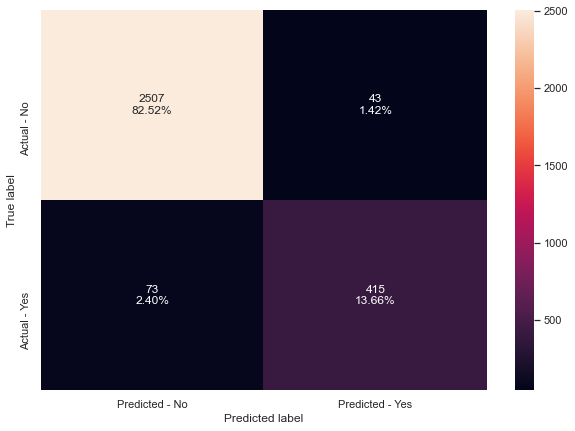

In [92]:
# Calculating different metrics
get_metrics_score(abc_tuned1)

# Creating confusion matrix
make_confusion_matrix(abc_tuned1, y_test)

- Scores are pretty good but the model is a little overfit
- Test recall is 85% so it's pretty good at predicting customers who will drop their credit cards

#### Random Search

In [93]:
%%time

# Creating pipeline
pipe = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "adaboostclassifier__n_estimators": np.arange(10, 110, 10),
    "adaboostclassifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "adaboostclassifier__base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
abc_tuned2 = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
abc_tuned2.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(abc_tuned2.best_params_,abc_tuned2.best_score_))

Best parameters are {'adaboostclassifier__n_estimators': 90, 'adaboostclassifier__learning_rate': 1, 'adaboostclassifier__base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.8884960197851456:
Wall time: 2min 15s


- Random Search was 4 minutes 13 seconds faster than Grid Search
- The parameters found are exactly the same as grid search, so no need to look at metric scores

## Gradient Boost

### Gridsearch

In [102]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=1))

#Parameter grid to pass in GridSearchCV
param_grid={"gradientboostingclassifier__n_estimators": np.arange(10, 110, 10),
    "gradientboostingclassifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

#Fitting parameters in GridSeachCV
grid_cv.fit(X_train,y_train)


print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Best parameters are {'gradientboostingclassifier__learning_rate': 0.2, 'gradientboostingclassifier__n_estimators': 100} with CV score=0.8771002395857485:
Wall time: 2min 32s


In [103]:
# Creating new pipeline with best parameters
gbc_tuned1 = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier(
        n_estimators=100,
        learning_rate=0.2,
        random_state=1,
    ),
)

# Fit the model on training data
gbc_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(learning_rate=0.2,
                                            random_state=1))])

Accuracy on training set :  0.988431151241535
Accuracy on test set :  0.9687294272547728
Recall on training set :  0.9446883230904302
Recall on test set :  0.8647540983606558
Precision on training set :  0.982648401826484
Precision on test set :  0.9356984478935698


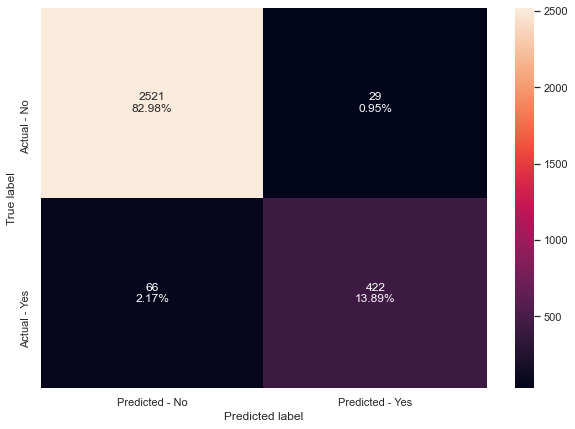

In [105]:
# Calculating different metrics
get_metrics_score(gbc_tuned1)

# Creating confusion matrix
make_confusion_matrix(gbc_tuned1, y_test)

- gbc_tuned1 performs worse on train data but better on test data
- test data is higher than Adaboost was and a little less overtuned

### Random Search

In [108]:
%%time

# Creating pipeline
pipe = make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid={"gradientboostingclassifier__n_estimators": np.arange(10, 110, 10),
    "gradientboostingclassifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1]
           }
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
gbc_tuned2 = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
gbc_tuned2.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(gbc_tuned2.best_params_,gbc_tuned2.best_score_))

Best parameters are {'gradientboostingclassifier__n_estimators': 100, 'gradientboostingclassifier__learning_rate': 0.2} with CV score=0.8771002395857485:
Wall time: 2min 32s


- RandomSearch returned the same parameters, in the same amount of time

## XGBoost

### Gridsearch

In [109]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(), XGBClassifier(random_state=1,eval_metric='logloss'))

#Parameter grid to pass in GridSearchCV
param_grid={'xgbclassifier__n_estimators':np.arange(50,300,50),'xgbclassifier__scale_pos_weight':[0,1,2,5,10],
            'xgbclassifier__learning_rate':[0.01,0.1,0.2,0.05], 'xgbclassifier__gamma':[0,1,3,5],
            'xgbclassifier__subsample':[0.7,0.8,0.9,1]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

#Fitting parameters in GridSeachCV
grid_cv.fit(X_train,y_train)


print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Best parameters are {'xgbclassifier__gamma': 5, 'xgbclassifier__learning_rate': 0.05, 'xgbclassifier__n_estimators': 100, 'xgbclassifier__scale_pos_weight': 10, 'xgbclassifier__subsample': 0.7} with CV score=0.9517157431022489:
Wall time: 1h 12min 46s


In [110]:
# Creating new pipeline with best parameters
xgb_tuned1 = make_pipeline(
    StandardScaler(),
    XGBClassifier(
        random_state=1,
        n_estimators=100,
        scale_pos_weight=10,
        subsample=0.7,
        learning_rate=0.05,
        gamma=5,
        eval_metric='logloss',
    ),
)

# Fit the model on training data
xgb_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, eval_metric='logloss',
                               gamma=5, gpu_id=-1, importance_type='gain',
                               interaction_constraints='', learning_rate=0.05,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=12, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=10,
                               subsample=0.7, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

Accuracy on training set :  0.9696670428893905
Accuracy on test set :  0.9605003291639236
Recall on training set :  0.9991220368744512
Recall on test set :  0.9528688524590164
Precision on training set :  0.841715976331361
Precision on test set :  0.8274021352313167


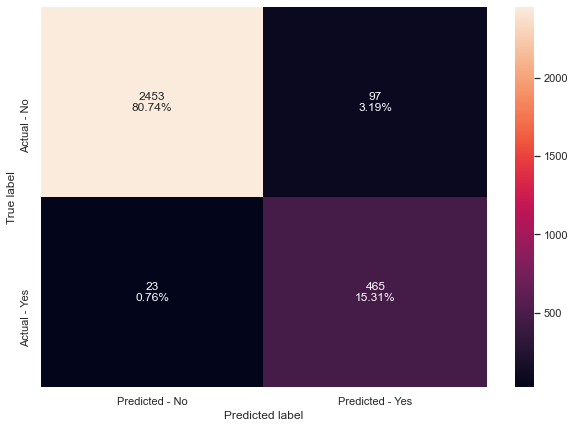

In [111]:
# Calculating different metrics
get_metrics_score(xgb_tuned1)

# Creating confusion matrix
make_confusion_matrix(xgb_tuned1, y_test)

- All scores but Precision are over 95%
- Recall scored 6% on test data compared to the cross validated score
- Model generalizes well

### Random Search

In [112]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(),XGBClassifier(random_state=1,eval_metric='logloss', n_estimators = 50))

#Parameter grid to pass in GridSearchCV
param_grid={'xgbclassifier__n_estimators':np.arange(50,300,50),
            'xgbclassifier__scale_pos_weight':[0,1,2,5,10],
            'xgbclassifier__learning_rate':[0.01,0.1,0.2,0.05],
            'xgbclassifier__gamma':[0,1,3,5],
            'xgbclassifier__subsample':[0.7,0.8,0.9,1],
           'xgbclassifier__max_depth':np.arange(1,10,1),
            'xgbclassifier__reg_lambda':[0,1,2,5,10]}





# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'xgbclassifier__subsample': 0.8, 'xgbclassifier__scale_pos_weight': 10, 'xgbclassifier__reg_lambda': 10, 'xgbclassifier__n_estimators': 50, 'xgbclassifier__max_depth': 2, 'xgbclassifier__learning_rate': 0.05, 'xgbclassifier__gamma': 5} with CV score=0.9648852306978901:
Wall time: 1min 10s


- Wait time decreased by 1 hr 11min 36sec

In [113]:
# Creating new pipeline with best parameters
xgb_tuned2 = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        (
            "XGB",
            XGBClassifier(
                random_state=1,
                n_estimators=50,
                scale_pos_weight=10,
                gamma=5,
                subsample=0.8,
                learning_rate= 0.05,
                eval_metric='logloss', max_depth = 2, reg_lambda = 10
            ),
        ),
    ]
)
# Fit the model on training data
xgb_tuned2.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('XGB',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, eval_metric='logloss',
                               gamma=5, gpu_id=-1, importance_type='gain',
                               interaction_constraints='', learning_rate=0.05,
                               max_delta_step=0, max_depth=2,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=50,
                               n_jobs=12, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=10, scale_pos_weight=10,
                               subsample=0.8, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

Accuracy on training set :  0.7871049661399548
Accuracy on test set :  0.7748518762343647
Recall on training set :  0.9771729587357331
Recall on test set :  0.9651639344262295
Precision on training set :  0.42873651771956856
Precision on test set :  0.413884007029877


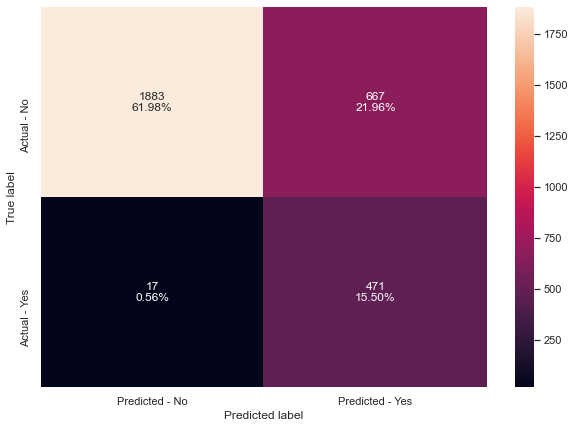

In [114]:
# Calculating different metrics
get_metrics_score(xgb_tuned2)

# Creating confusion matrix
make_confusion_matrix(xgb_tuned2, y_test)

- This model gives the best Recall score of any model, at the cost of Accuracy and Precision, which are much lower
- This model generalizes well

## Comparing all models

In [117]:
# defining list of models
models = [abc_tuned1, abc_tuned2,gbc_tuned1,gbc_tuned2, xgb_tuned1, xgb_tuned2]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:

    j = get_metrics_score(model, False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [118]:
comparison_frame = pd.DataFrame(
    {
        "Model": [
            "Adaboost with GridSearchCV",
            "Adaboost Tree with RandomizedSearchCV",
            'Gradient boost with GridSearchCV',
            'Gradient boost with RanomizedSearchCV',
            "XGBoost with GridSearchCV",
            "XGBoost with RandomizedSearchCV",
    
        ],
        "Train_Accuracy": acc_train,
        "Test_Accuracy": acc_test,
        "Train_Recall": recall_train,
        "Test_Recall": recall_test,
        "Train_Precision": precision_train,
        "Test_Precision": precision_test,
    }
)

# Sorting models in decreasing order of test recall
comparison_frame.sort_values(by="Test_Recall", ascending=False)

Model  Train_Accuracy  Test_Accuracy  \
5        XGBoost with RandomizedSearchCV        0.787105       0.774852   
4              XGBoost with GridSearchCV        0.969667       0.960500   
2       Gradient boost with GridSearchCV        0.988431       0.968729   
3  Gradient boost with RanomizedSearchCV        0.944688       0.864754   
0             Adaboost with GridSearchCV        0.995203       0.961817   
1  Adaboost Tree with RandomizedSearchCV        0.985075       0.850410   

   Train_Recall  Test_Recall  Train_Precision  Test_Precision  
5      0.977173     0.965164         0.428737        0.413884  
4      0.999122     0.952869         0.841716        0.827402  
2      0.944688     0.864754         0.982648        0.935698  
3      0.944688     0.864754         0.982648        0.935698  
0      0.985075     0.850410         0.985075        0.906114  
1      0.985075     0.850410         0.985075        0.906114

- The XGBoost with randomized search gives the best Recall but the worst Precision and Accuracy
- The XGBoost with GridSearchCV much better Accuracy and precision at the cost of slightly worse Recall, so an argument could be made for that model as well, but we will look at the feature importances of the model with the best Recall as that is the score that is our priority:

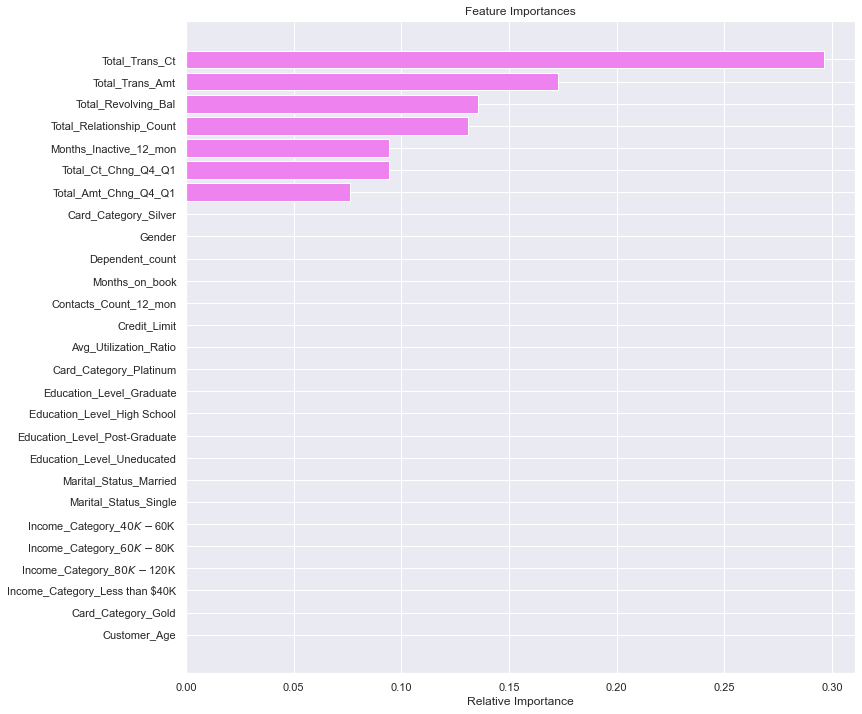

In [119]:
feature_names = X_train.columns
importances = xgb_tuned2[1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- The amount of money spent on transactions is the most important feature, followed by the amount of transactions, total revolving balance, and the total number of relationships with the bank

## Business Recommendations

- The amount of money spent on transactions and the amount of transactions were the most salient features for predicting whether someone would cancel their card, suggesting that people might cancel their cards when they are overspending
- This is reinforced by some of the other salient features, such as revolving balance and the Q1-Q4 changes
- Total relationship count might also imply that people with several credit cards who spend a lot are the most likely to close
- Thera Bank should limit the amount of cards one can hold if they show bad spending habits and have a large revolving balance